# COS60008 Introduction to Data Science
## Assignment 1, 2024, Semester 1
## Student Details:
* Name: Harrison Stefanidis
* Student ID: 105260443
* Email: 105260443@student.swin.edu.au
* Submission Date: 19/04/2024
* TuteLab Class: Monday 12:30pm

## Task 1 - Data Acquisition and Preparation

### Sub-Task 1.1 - Load and Check Data

In [1]:
import pandas as pd

# Load datasets and rename to df1, df1, df3
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df3 = pd.read_csv("data3.csv")

# Observe dataframe heads separately
df1.head()

,id,symboling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight
0,12693,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337
1,26247,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824
2,28588,1,158,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844
3,21463,1,158,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,55.9,3086
4,31110,2,192,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,2395


In [2]:
df2.head()

,id,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,12693,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,26247,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,28588,ohc,five,136,mpfi,3.19,3.4,8.5,1100,5500,19,25,17710
3,21463,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,31110,ohc,four,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [3]:
df3.head()

,id,symboling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,25411,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
1,21573,0,NaN,isuzu,gas,std,four,sedan,fwd,front,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
2,27214,2,134.0,toyota,gas,std,two,hardtop,rwd,front,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,8449.0
3,13279,1,74.0,toyota,gas,std,four,hatchback,fwd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0
4,18075,2,122.0,volkswagen,diesel,std,two,sedan,fwd,front,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775.0


### Sub-Task 1.2 - Integrate Data and Check Attributes

In [4]:
# Combining dataframes into single dataframe
df12 = pd.merge(df1, df2, on="id", how="inner") # Merging df1 and df2 based on similar ids
df_combined = pd.concat([df12, df3], axis=0) # Concatenating merged df1 and df2 with df3 as df3 has no similar ids

# Save combined dataframe as combined_df
df_combined.to_csv("combined_data.csv", index=False)

# Print head of combined dataframe
df_combined.head()

,id,symboling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,12693,2,164.0,audi,gas,std,4,sedan,fwd,front,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
1,26247,2,164.0,audi,gas,std,4,sedan,4wd,front,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0
2,28588,1,158.0,audi,gas,std,4,sedan,fwd,front,...,136,mpfi,3.19,3.4,8.5,1100,5500,19,25,17710.0
3,21463,1,158.0,audi,gas,turbo,4,sedan,fwd,front,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875.0
4,31110,2,192.0,bmw,gas,std,2,sedan,rwd,front,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430.0


### Sub-Task 1.3 - Cleaning the Data

In [5]:
# Load new combined_data dataset as df4
df4 = pd.read_csv("combined_data.csv")

# Quick info check to observe any obvious entry issues
print(df4.info())

# Checking each column if attribute meets expected details/parameters (turn into function)
def validate_dataframe(df4):
    ID = all(isinstance(x, int) and 10000 <= x <= 40000 for x in df4['id'])
    if ID:
        print("ID is integer between 10,000 and 40,000")
    else:
        print("ID does not meet parameters")

    symboling = all(isinstance(x, int) and -3 <= x <= 3 for x in df4["symboling"])
    if symboling:
        print("Symboling is integer between -3 and 3")
    else:
        print("Symboling does not meet parameters")

    normalised_losses = all(isinstance(x, float) and 65.0 <= x <= 256.0 for x in df4["normalised-losses"])
    if normalised_losses:
        print("Normalised losses is float between 65.0 and 256.0")
    else:
        print("Normalised losses does not meet parameters")

    brand_list = {"alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "mercedes-benz", "mercury",
                  "mitsubishi", "nissan", "peugot", "plymouth", "porsche", "saab", "subaru", "toyota", "volkswagen", "volvo"}
    make = all(isinstance(make, object) and make in brand_list for make in df4["make"])
    if make:
        print("Make is object and matches dataset")
    else:
        print("Make does not meet parameters")

    fuel_list = {"gas", "diesel"}
    fuel_type = all(isinstance("fuel-type", object) and fueltype in fuel_list for fueltype in df4["fuel-type"])
    if fuel_type:
        print("Fuel type is either gas or diesel")
    else:
        print("Fuel type does not meet parameters")

    aspiration_list = {"std", "turbo"}
    aspiration = all(isinstance("aspiration", object) and aspiration in aspiration_list for aspiration in df4["aspiration"])
    if aspiration:
        print("Aspiration is either std or turbo")
    else:
        print("Aspiration does not meet parameters")

    num_of_doors = all(isinstance(x, int) and x in {2, 4} for x in df4["num-of-doors"])
    if num_of_doors:
        print("Number of doors is integer value 2 or 4")
    else:
        print("Number of doors does not meet parameters")

    body_style_list = {"hardtop", "wagon", "sedan", "hatchback", "convertible"}
    body_style = all(isinstance("body-style", object) and bodystyle in body_style_list for bodystyle in df4["body-style"])
    if body_style:
        print("Body style is object and matches dataset")
    else:
        print("Body style does not meet parameters")

    drive_wheels_list = {"4wd", "fwd", "rwd"}
    drive_wheels = all(isinstance("drive-wheels", object) and drivewheels in drive_wheels_list for drivewheels in df4["drive-wheels"])
    if drive_wheels:
        print("Drive wheels is either 4wd, fwd, or rwd")
    else:
        print("Drive wheels does not meet parameters")

    engine_location_list = {"front", "rear"}
    engine_location = all(isinstance("engine-location", object) and enginelocation in engine_location_list for enginelocation in df4["engine-location"])
    if engine_location:
        print("Engine location is either front or rear")
    else:
        print("Engine location does not meet parameters")

    wheel_base = all(isinstance(x, float) and 86.6 <= x <= 120.9 for x in df4["wheel-base"])
    if wheel_base:
        print("Wheel base is float between 86.6 and 120.9")
    else:
        print("Wheel base does not meet parameters")

    length = all(isinstance(x, float) and 141.1 <= x <= 208.1 for x in df4["length"])
    if length:
        print("Length is float between 141.1 and 208.1")
    else:
        print("Length does not meet parameters")

    width = all(isinstance(x, float) and 60.3 <= x <= 72.3 for x in df4["width"])
    if width:
        print("Width is float between 60.3 and 72.3")
    else:
        print("Width does not meet parameters")

    height = all(isinstance(x, float) and 47.8 <= x <= 59.8 for x in df4["height"])
    if height:
        print("Height is float between 47.8 and 59.8")
    else:
        print("Height does not meet parameters")

    curb_weight = all(isinstance(x, int) and 1488 <= x <= 4066 for x in df4["curb-weight"])
    if curb_weight:
        print("Curb weight is integer between 1488 and 4066")
    else:
        print("Curb weight does not meet parameters")

    engine_type_list = {"dohc", "dohcv", "l", "ohc", "ohcf", "ohcv"}
    engine_type = all(isinstance("engine-type", object) and enginetype in engine_type_list for enginetype in df4["engine-type"])
    if engine_type:
        print("Engine type is object and matches dataset")
    else:
        print("Engine type does not meet parameters")

    num_of_cylinders_list = {"eight", "five", "four", "six", "three", "twelve"}
    num_of_cylinders = all(isinstance("num-of-cylinders", object) and numofcylinders in num_of_cylinders_list for numofcylinders in df4["num-of-cylinders"])
    if num_of_cylinders:
        print("Number of cylinders is object and matches dataset")
    else:
        print("Number of cylinders does not meet parameters")

    engine_size = all(isinstance(x, int) and 61 <= x <= 326 for x in df4["engine-size"])
    if engine_size:
        print("Engine size is integer between 61 and 326")
    else:
        print("Engine size does not meet parameters")

    fuel_system_list = {"1bbl", "2bbl", "idi", "mfi", "mpfi", "spdi", "spfi"}
    fuel_system = all(isinstance("fuel-system", object) and fuelsystem in fuel_system_list for fuelsystem in df4["fuel-system"])
    if fuel_system:
        print("Fuel system is object and matches dataset")
    else:
        print("Fuel system does not meet parameters")

    bore = all(isinstance(x, float) and 2.54 <= x <= 3.94 for x in df4["bore"])
    if bore:
        print("Bore is float between 2.54 and 3.94")
    else:
        print("Bore does not meet parameters")

    stroke = all(isinstance(x, float) and 2.07 <= x <= 4.17 for x in df4["stroke"])
    if stroke:
        print("Stroke is float between 2.07 and 4.17")
    else:
        print("Stroke does not meet parameters")

    compression_ratio = all(isinstance(x, float) and 7.0 <= x <= 23.0 for x in df4["compression-ratio"])
    if compression_ratio:
        print("Compression ratio is float between 7.0 and 23.0")
    else:
        print("Compression ratio does not meet parameters")

    horsepower = all(isinstance(x, int) and 48.0 <= x <= 288.0 for x in df4["horsepower"])
    if horsepower:
        print("Horsepower is float between 48.0 and 288.0")
    else:
        print("Horsepower does not meet parameters")

    peak_rpm = all(isinstance(x, int) and 4150.0 <= x <= 6600.0 for x in df4["peak-rpm"])
    if peak_rpm:
        print("Peak RPM is float between 4150.0 and 6600.0")
    else:
        print("Peak RPM does not meet parameters")

    city_mpg = all(isinstance(x, int) and 13 <= x <= 49 for x in df4["city-mpg"])
    if city_mpg:
        print("City MPG is integer between 13 and 49")
    else:
        print("City MPG does not meet parameters")

    highway_mpg = all(isinstance(x, int) and 16 <= x <= 54 for x in df4["highway-mpg"])
    if highway_mpg:
        print("Highway MPG is integer between 16 and 54")
    else:
        print("Highway MPG does not meet parameters")

    price = all(isinstance(x, float) and 5118.0 <= x <= 45400.0 for x in df4["price"])
    if price:
        print("Price is float between 5118.0 and 45400.0")
    else:
        print("Price does not meet parameters")

validate_dataframe(df4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 199 non-null    int64  
 1   symboling          199 non-null    int64  
 2   normalised-losses  161 non-null    float64
 3   make               199 non-null    object 
 4   fuel-type          199 non-null    object 
 5   aspiration         199 non-null    object 
 6   num-of-doors       199 non-null    object 
 7   body-style         199 non-null    object 
 8   drive-wheels       199 non-null    object 
 9   engine-location    199 non-null    object 
 10  wheel-base         199 non-null    float64
 11  length             199 non-null    float64
 12  width              199 non-null    float64
 13  height             199 non-null    float64
 14  curb-weight        199 non-null    int64  
 15  engine-type        199 non-null    object 
 16  num-of-cylinders   199 non

In [6]:
# Check for all unique values in each column to ensure that they match expected parameters.
unique_values = df4.apply(lambda column: list(column.unique()))
print(unique_values)

# Cleaning data which doesn't meet expected parameters
# In this case, normalised losses, fuel type, number of doors, number of cylinders, fuel system, horsepower, price.

# Fill missing values in the "normalised-losses" column with median normalised-losses
df4["normalised-losses"] = df4["normalised-losses"].fillna(df4["normalised-losses"].median())

# Strip any leading or trailing whitespace from "fuel type".
df4["fuel-type"] = df4["fuel-type"].str.strip()

# Replace "two" and "four" in "num_of_doors" with "2" and "4".
df4["num-of-doors"] = df4["num-of-doors"].replace({"two": "2", "four": "4"})

# Replace "sixth" with "six" in number of cylinders
df4["num-of-cylinders"] = df4["num-of-cylinders"].replace("sixth", "six")

# Set strings to lowercase for values in "fuel system"
df4["fuel-system"] = df4["fuel-system"].str.lower()

# Replace any values outside of 48.0 to 288.0 with median value for "horsepower"
df4.loc[(df4["horsepower"] < 48.0) | (df4["horsepower"] > 288.0), "horsepower"] = df4["horsepower"].median()

# Replace empty cells for "price" with median value
df4["price"] = df4["price"].fillna(df4["price"].median())

# Save as completely cleaned finalised dataset
df4.to_csv("final_data.csv", index=False)

# Validate new dataset once more to check if they meet expected parameters.
df5 = pd.read_csv("final_data.csv")
validate_dataframe(df5)

id                   [12693, 26247, 28588, 21463, 31110, 23231, 184...
symboling                                         [2, 1, 0, -1, 3, -2]
normalised-losses    [164.0, 158.0, 192.0, 188.0, 121.0, 98.0, 81.0...
make                 [audi, bmw, chevrolet, dodge, honda, jaguar, m...
fuel-type                                      [gas, diesel, diesel  ]
aspiration                                                [std, turbo]
num-of-doors                                         [4, 2, two, four]
body-style             [sedan, hatchback, wagon, hardtop, convertible]
drive-wheels                                           [fwd, 4wd, rwd]
engine-location                                          [front, rear]
wheel-base           [99.8, 99.4, 105.8, 101.2, 88.4, 94.5, 93.7, 1...
length               [176.6, 192.7, 176.8, 141.1, 155.9, 158.8, 157...
width                [66.2, 66.4, 71.4, 64.8, 60.3, 63.6, 63.8, 64....
height               [54.3, 55.7, 55.9, 53.2, 52.0, 50.8, 50.6, 59....
curb-w

## Task 2 - Data Exploration

### Sub-Task 2.1 - Exploring One Pair of Relationships

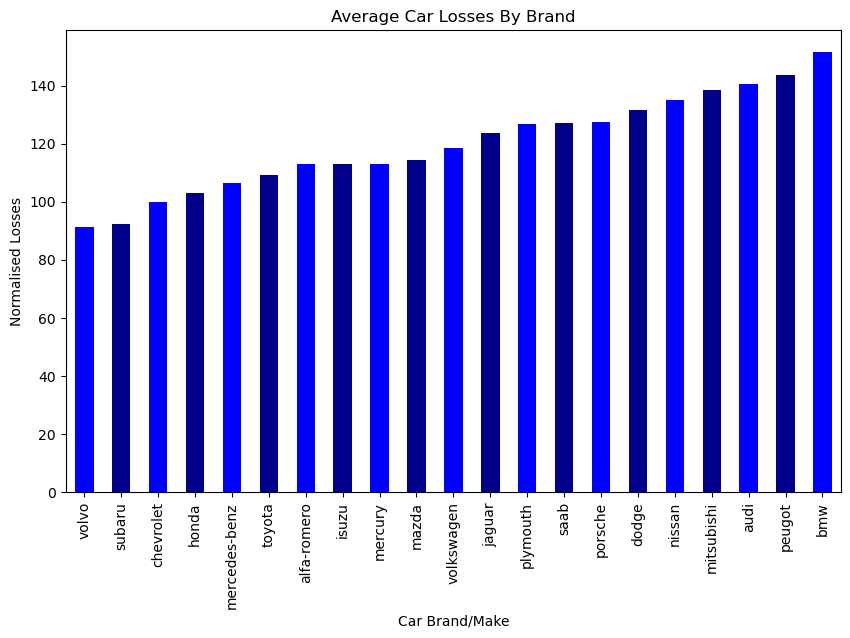

In [7]:
import matplotlib.pyplot as plt

# Group make and normalised losses mean together
make_loss = df5.groupby("make")["normalised-losses"].mean()

# Sort by lowest value to highest
make_loss_order = make_loss.sort_values(ascending=True)

# Exploring the relationship between make and normalised losses by plotting
plt.figure(figsize=(10, 6))
colors = ("blue", "darkblue")
make_loss_order.plot(kind="bar", color=colors)
plt.xlabel("Car Brand/Make")
plt.ylabel("Normalised Losses")
plt.title("Average Car Losses By Brand")
plt.savefig("average_car_losses_by_brand.png", bbox_inches="tight")
plt.show()

### Sub-Task 2.2 - Exploring 3 Pairs of Relationships

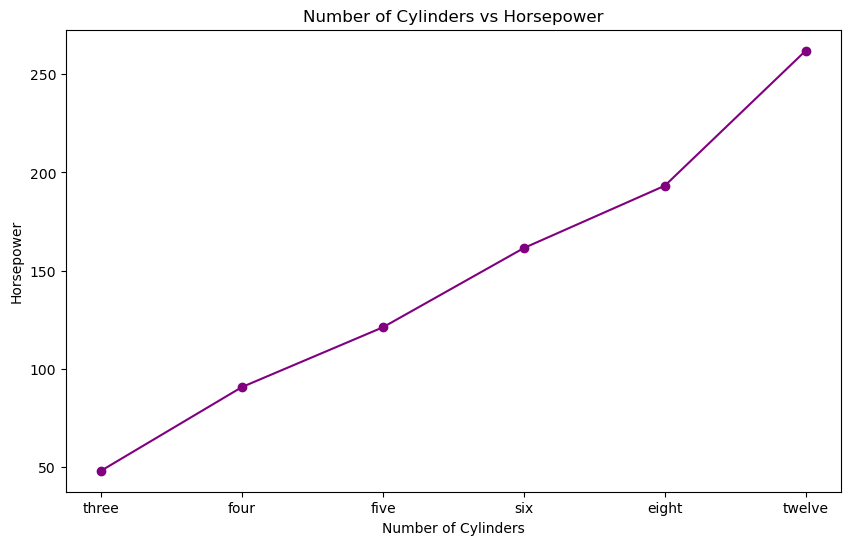

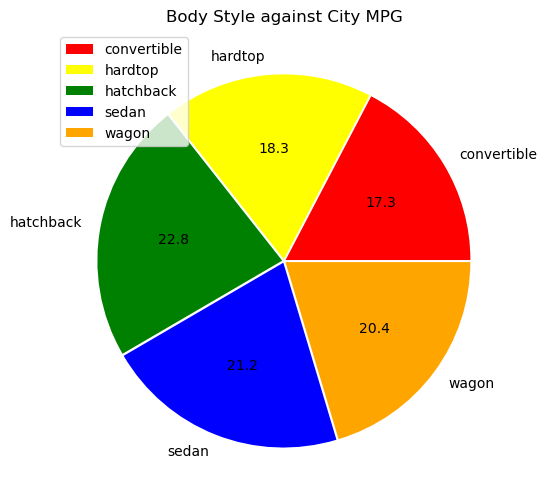

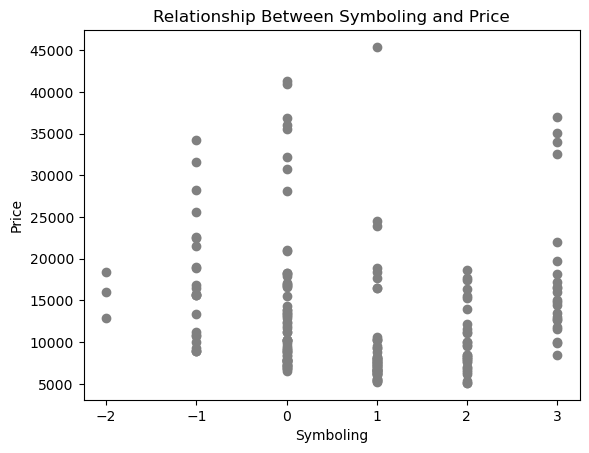

In [8]:
# Group number of cylinders and horsepower mean together
cyl_horse = df5.groupby("num-of-cylinders")["horsepower"].mean()

# Sort by lowest value to highest
cyl_horse_order = cyl_horse.sort_values(ascending=True)

# Exploring the relationship between number of cylinders against its horsepower by plotting
plt.figure(figsize=(10, 6))
cyl_horse_order.plot(kind="line", marker="o", color="purple")
plt.xlabel("Number of Cylinders")
plt.ylabel("Horsepower")
plt.title("Number of Cylinders vs Horsepower")
plt.savefig("number_of_cylinders_vs_horsepower.png", bbox_inches="tight")
plt.show()

# Group body style and city MPG mean together
body_city = df5.groupby("body-style")["city-mpg"].mean()

# Exploring the relationship between body style and city MPG by plotting
plt.figure(figsize=(10, 6))
plt.pie(
    body_city, 
    labels=body_city.index,
    colors=['red', 'yellow', 'green', 'blue', 'orange'],  
    explode=(0.01, 0.01, 0.01, 0.01, 0.01),
    autopct='%1.1f'
)
plt.title("Body Style against City MPG")
plt.legend(loc="upper left")
plt.savefig("body_style_against_city_mpg.png", bbox_inches="tight")
plt.show()

# Exploring the relationship between symboling and price by plotting
plt.scatter(df5["symboling"], df5["price"], color="grey")
plt.xlabel("Symboling")
plt.ylabel("Price")
plt.title("Relationship Between Symboling and Price")
plt.savefig("symboling_vs_price.png")
plt.show()

### Sub-Task 2.3 - Visualisation of Scatter Matrix

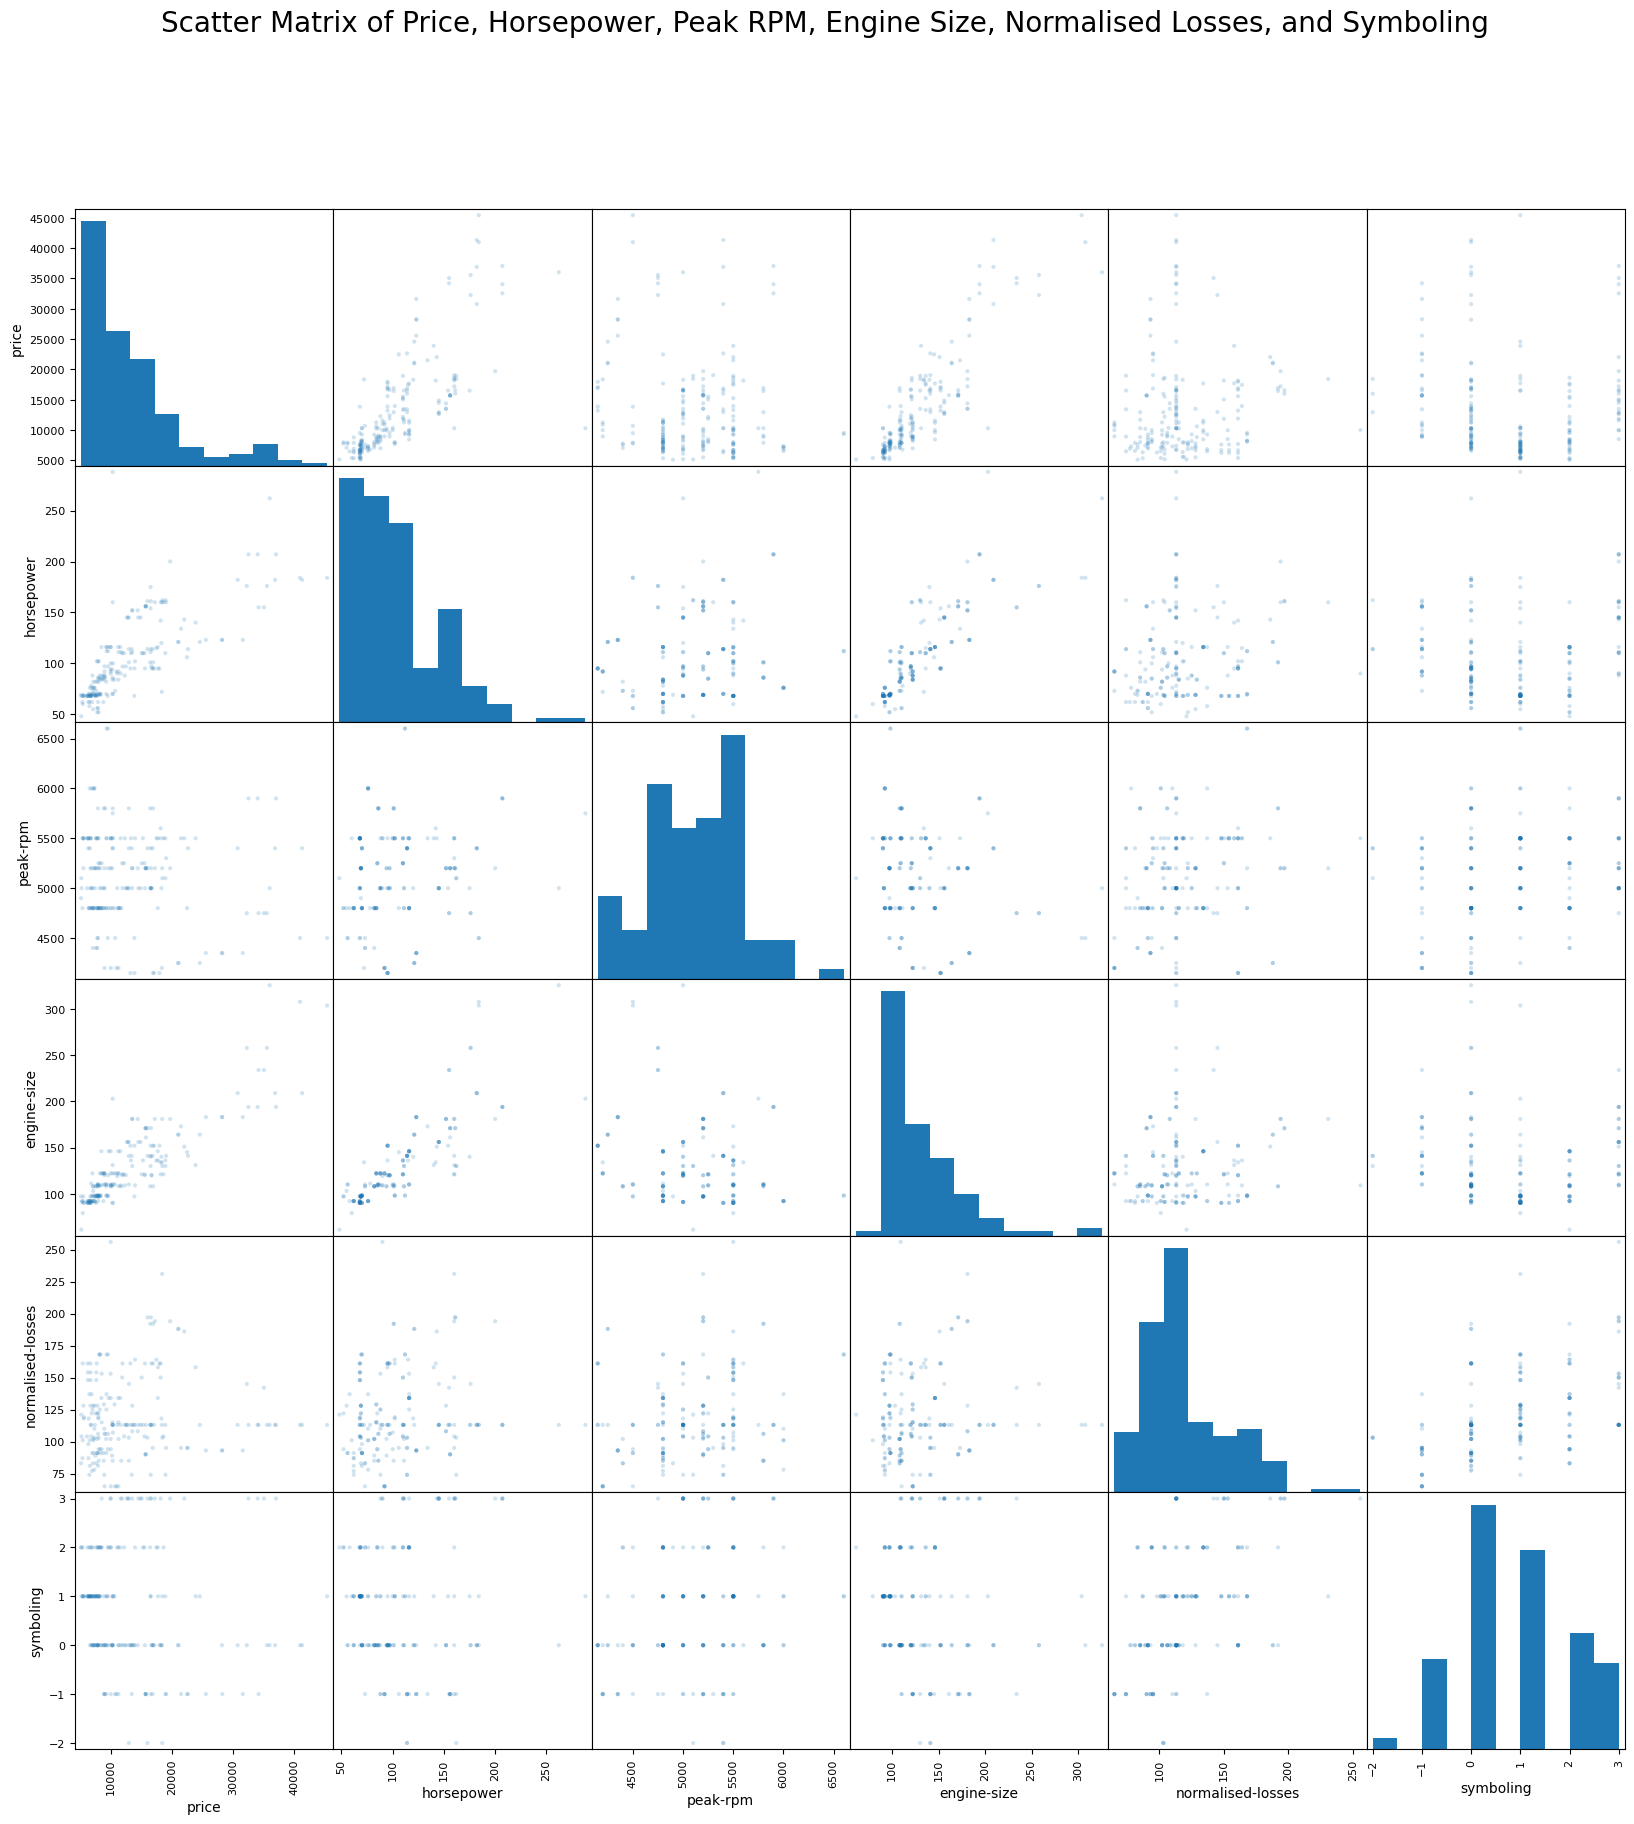

In [9]:
# Group all 6 numerical columns together
six_num = ["price", "horsepower", "peak-rpm", "engine-size", "normalised-losses", "symboling"]

# Scatter matrix of 6 numerical columns: price, horsepower, number of cylinders, engine size, normalised losses, and symboling
pd.plotting.scatter_matrix(df5[six_num], alpha=0.2, figsize=(20, 20))
plt.suptitle("Scatter Matrix of Price, Horsepower, Peak RPM, Engine Size, Normalised Losses, and Symboling", fontsize=20)
plt.savefig("scattermatrix.png", bbox_inches="tight")